The **Quantum Subspace Expansion (QSE)** method has garnered attention for its ability to extend the utility of quantum algorithms like the Variational Quantum Eigensolver (VQE). While VQE is effective at finding the ground state energy of a molecular Hamiltonian, it may struggle to capture excited states or provide highly accurate results due to noise and limited quantum resources. This is where QSE proves to be a valuable augmentation.

QSE builds on the concept of exploring a subspace of states around the ground state obtained from VQE. By constructing a small subspace spanned by basis vectors—typically generated by applying excitation operators to the VQE solution—QSE allows for more refined energy calculations, including the estimation of excited states. This subspace is diagonalized, resulting in an extended spectrum of eigenvalues that includes both the ground and excited states.

The key advantage of QSE is that it leverages the same variational principles as VQE but with a broader subspace, providing a more accurate picture of the electronic structure of molecules. The quantum computer is used to measure additional matrix elements of the Hamiltonian and overlap matrices within the subspace, which are then processed classically to determine eigenvalues corresponding to excited states.

Mathematically, QSE involves solving a generalized eigenvalue problem:

$$
H_{\text{eff}} \mathbf{c} = E_{\text{QSE}} S_{\text{eff}} \mathbf{c}
$$

Here, $ H_{\text{eff}} $ is the effective Hamiltonian matrix, $ S_{\text{eff}} $ is the overlap matrix, $ \mathbf{c} $ is the vector of expansion coefficients, and $ E_{\text{QSE}} $ are the eigenvalues representing the energies of the system. The classical computation deals with solving this eigenvalue equation once the quantum subspace has been expanded.

QSE offers a more accurate quantum chemistry simulation method, particularly for small and intermediate-sized quantum devices. It mitigates errors by effectively exploring a local region around the VQE solution. As quantum devices scale and noise mitigation techniques improve, QSE is expected to become even more relevant for both ground and excited state calculations.

Moreover, QSE has practical applications in areas where understanding excited states is crucial, such as in photochemistry, materials science, and the development of photovoltaic materials. Its ability to expand the utility of early-stage quantum devices makes it a promising candidate in the quest to solve complex molecular problems.

By providing access to excited states and improving the precision of ground state calculations, Quantum Subspace Expansion is a significant step forward in the practical application of quantum computing to chemistry. As quantum hardware continues to advance, we can expect QSE to play an increasingly vital role in simulating complex chemical systems with greater accuracy and efficiency. 

In [1]:
# Import necessary Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit.circuit.library import EfficientSU2
from qiskit.quantum_info import Statevector, partial_trace
from qiskit.visualization import plot_histogram, plot_bloch_multivector, plot_state_qsphere, plot_state_city
from qiskit.visualization.state_visualization import plot_state_paulivec
from qiskit_aer import AerSimulator
from qiskit_algorithms import VQE
from qiskit_algorithms.optimizers import SLSQP
from qiskit.quantum_info import SparsePauliOp
from qiskit.primitives import Estimator
from qiskit_algorithms.utils import algorithm_globals

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Set up simulator backend
backend = AerSimulator()

In [3]:
# Define Hamiltonian using SparsePauliOp
pauli_terms = ['ZZ', 'IX', 'XI']
coeffs = [1, -1, -1]
H_pauli = SparsePauliOp.from_list(zip(pauli_terms, coeffs))

In [4]:
# Define a quantum circuit ansatz using EfficientSU2
ansatz = EfficientSU2(num_qubits=2, reps=2)

In [5]:
# Set random seed for reproducibility
algorithm_globals.random_seed = 42

In [6]:
# Choose an optimizer (SLSQP)
optimizer = SLSQP()

In [7]:
# Callback to store energy values during optimization
energy_values = []

def callback(eval_count, parameters, energy, stddev):
    energy_values.append(energy)

In [8]:
# Use Estimator primitive for VQE
vqe = VQE(ansatz=ansatz, optimizer=optimizer, callback=callback, estimator=Estimator())

In [9]:
# Run VQE using the estimator and get the result
result = vqe.compute_minimum_eigenvalue(operator=H_pauli)
print(f"Ground state energy from VQE: {result.eigenvalue}")

Ground state energy from VQE: -2.2360678721574616


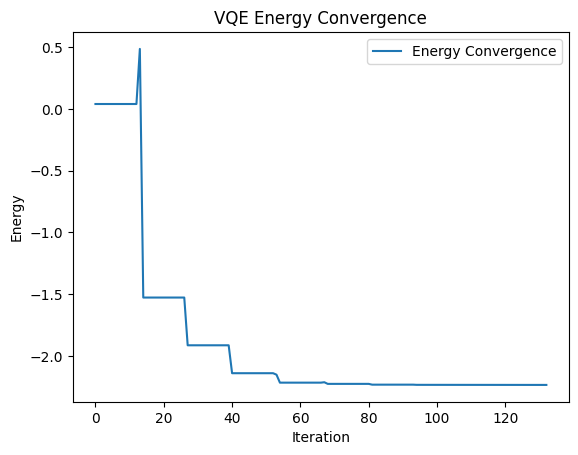

In [10]:
# Energy convergence plot
plt.plot(energy_values, label='Energy Convergence')
plt.xlabel('Iteration')
plt.ylabel('Energy')
plt.title('VQE Energy Convergence')
plt.legend()
plt.show()

In [11]:
# Define the quantum circuit for the ground state
ground_state_circuit = ansatz.assign_parameters(result.optimal_point)

In [12]:
# Transpile the circuit for the AerSimulator backend
qc_transpiled = transpile(ground_state_circuit, backend=backend)

In [13]:
# Add measurements for visualization
qc_transpiled.measure_all()

In [14]:
# Run the transpiled circuit on AerSimulator
job = backend.run(qc_transpiled)
counts = job.result().get_counts()

In [15]:
# Simulate the statevector for visualization purposes
state = Statevector.from_label('00').evolve(ground_state_circuit)

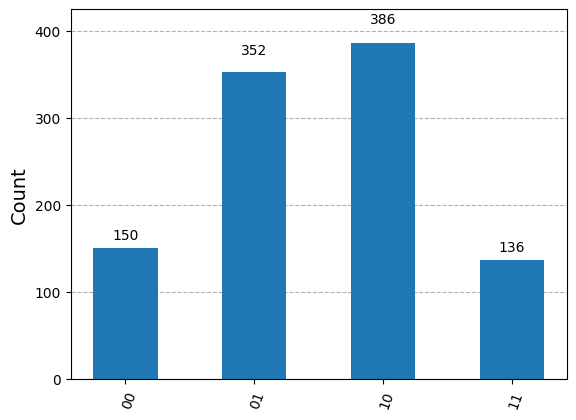

In [16]:
# Plot the histogram of measurement counts
plot_histogram(counts)
plt.show()

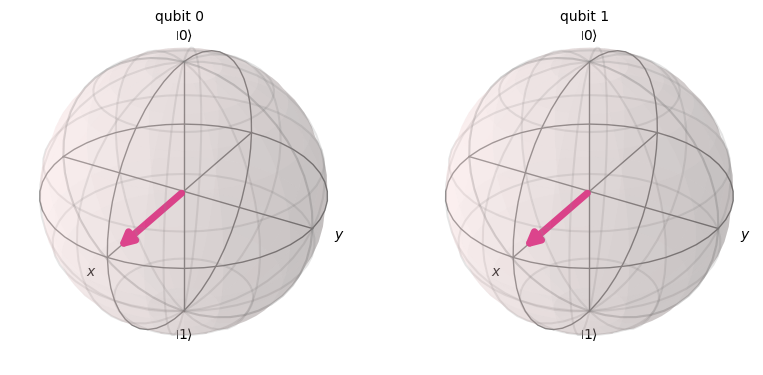

In [17]:
#  Plot the Bloch sphere representation of the statevector
plot_bloch_multivector(state)
plt.show()

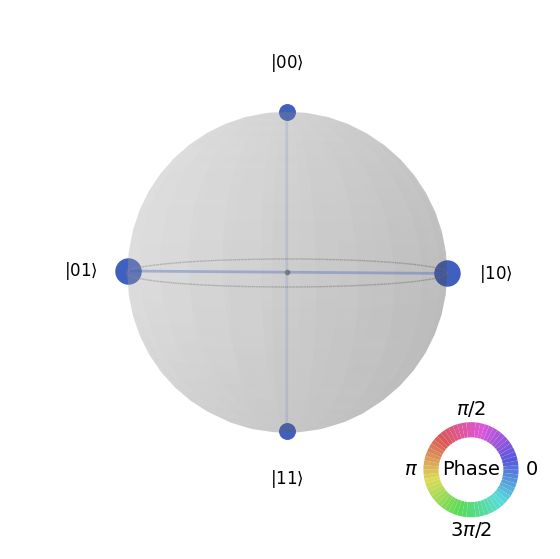

In [18]:
#. Plot the state Qsphere representation
plot_state_qsphere(state)
plt.show()

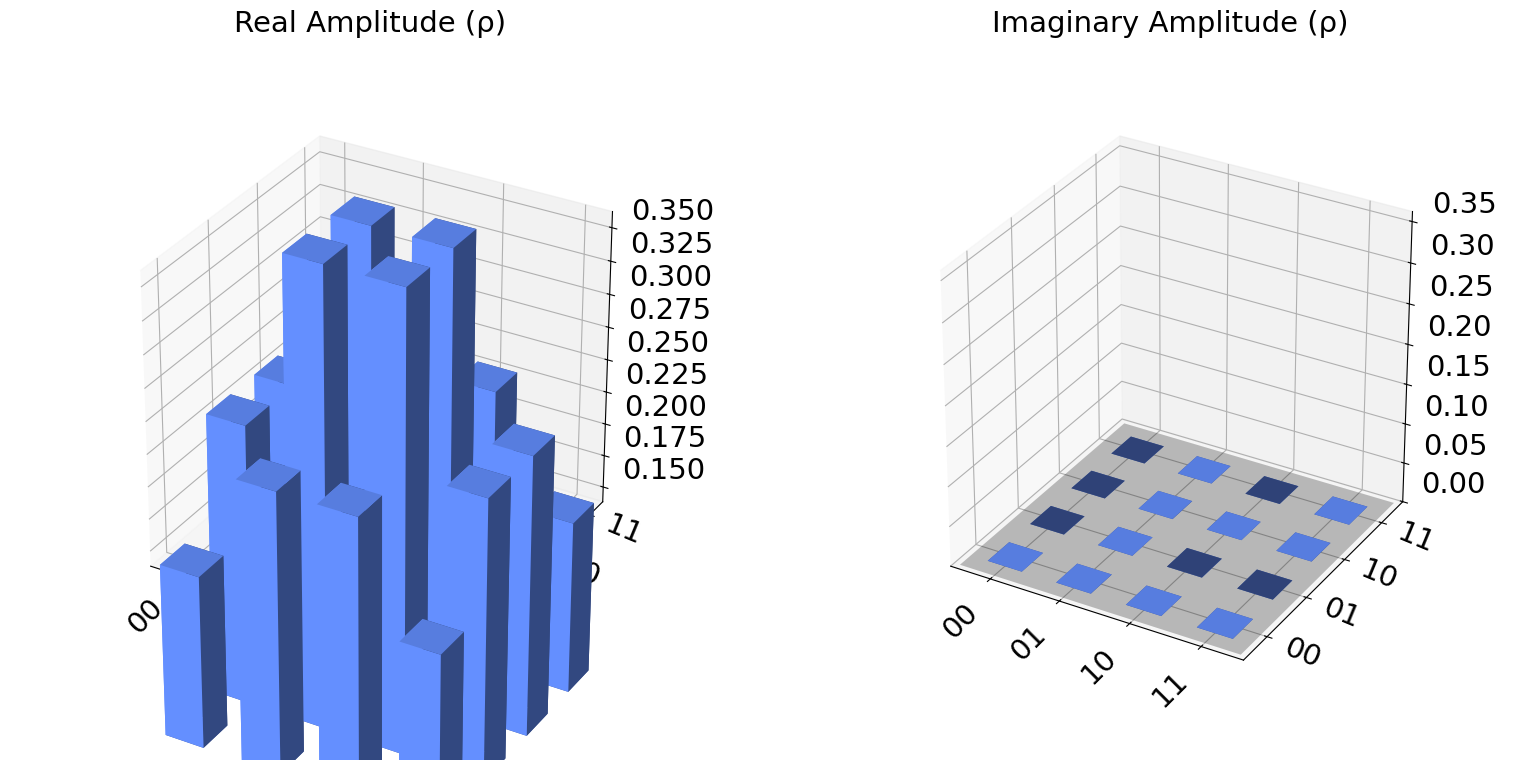

In [19]:
# Plot the state city visualization
plot_state_city(state)
plt.show()

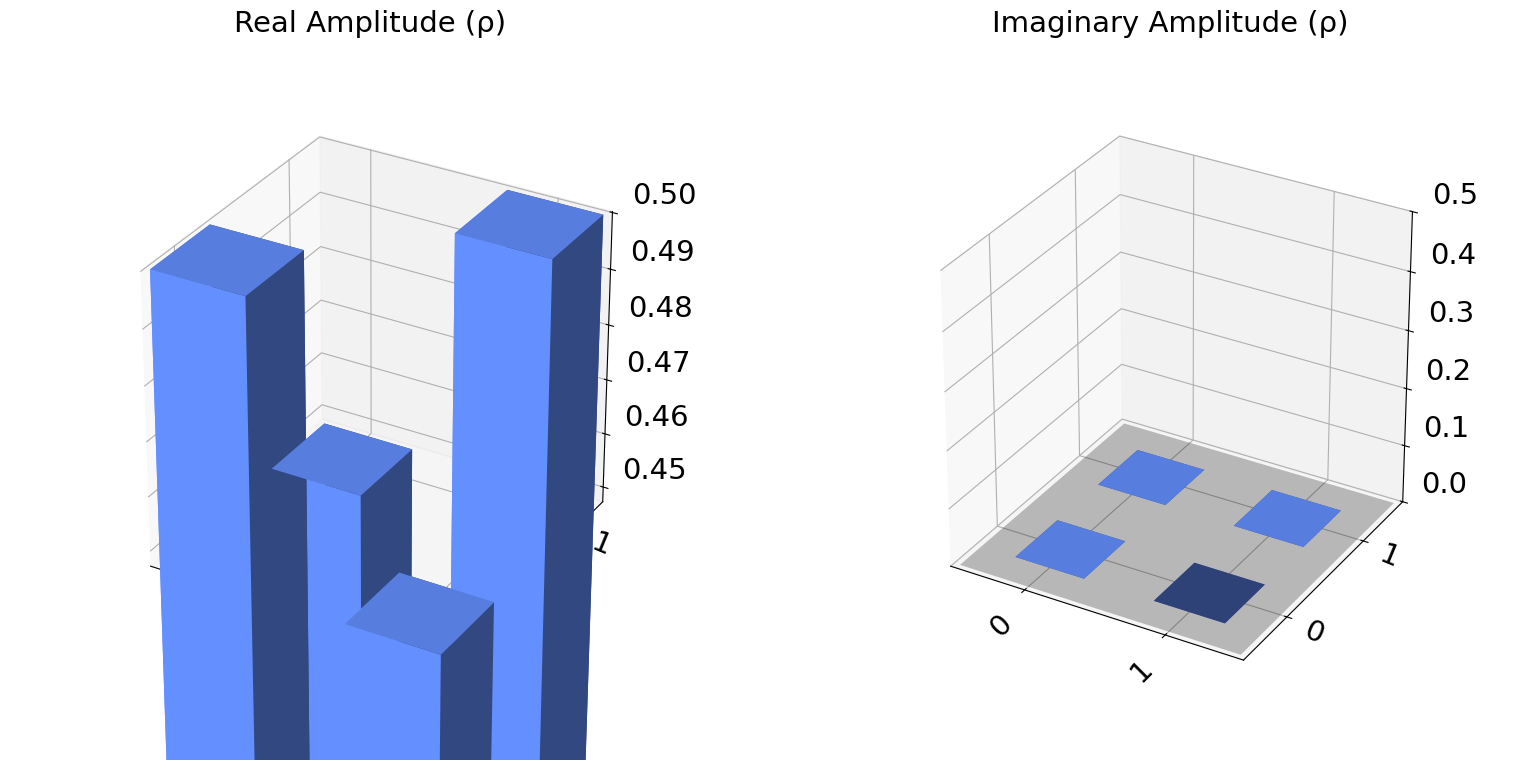

In [20]:
# Plot the partial trace (for 1st qubit)
rho = state.to_operator().data
partial_traced_rho = partial_trace(rho, [0])
plot_state_city(partial_traced_rho)
plt.show()

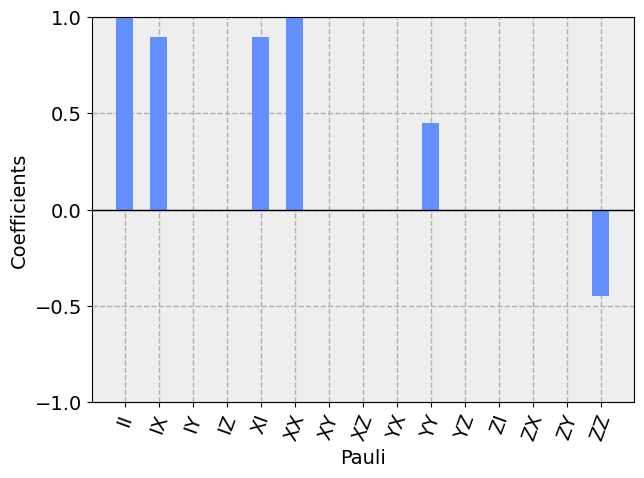

In [21]:
# Plot the Pauli vector visualization (optional)
plot_state_paulivec(state)
plt.show()